# Ensemble Learning and Random Forests

# Voting classifiers

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Hard voting:

In [3]:
log_clf = LogisticRegression()
rf_clf = RandomForestClassifier()
svm_clf = SVC()

In [4]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rf_clf), ('svc', svm_clf)],
    voting='hard')

In [5]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [6]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rf_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.896


Soft voting:

In [7]:
log_clf = LogisticRegression(random_state=42, solver="lbfgs")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=100)
svm_clf = SVC(gamma="scale", probability=True, random_state=42) # By default SVM doesnt compute proba and doesnt have predict_proba() func

voting_clf = VotingClassifier(
    estimators=[("lr", log_clf), ("rf", rf_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=100)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [8]:
for clf in (log_clf, rf_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


# Bagging & Pasting

Another approach is to use the same training algorithm for every predictor and train them on different random subsets of the training set. When sampling is performed with replacement, this method is called *bagging* (short for *bootstrap aggregating*).  
When sampling is performed without replacement, it is called *pasting*.

In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_jobs=-1, max_samples=100, n_estimators=500, bootstrap=True)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [10]:
y_pred = bag_clf.predict(X_test)

### Out-of-bag evaluation

In [11]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1, oob_score=True)

In [12]:
bag_clf.oob_score_

0.9013333333333333

In [13]:
from sklearn.metrics import accuracy_score

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

In [14]:
bag_clf.oob_decision_function_[:10]

array([[0.49456522, 0.50543478],
       [0.32954545, 0.67045455],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.07514451, 0.92485549],
       [0.46111111, 0.53888889],
       [0.0106383 , 0.9893617 ],
       [1.        , 0.        ],
       [0.98907104, 0.01092896]])

## Random Forests

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [16]:
y_pred_rf = rf_clf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.904

## Feature importance

In [17]:
from sklearn.datasets import load_iris
iris = load_iris()
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rf_clf.fit(iris["data"], iris["target"])
for name,score in zip(iris["feature_names"], rf_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.0919741894654793
sepal width (cm) 0.021335992334116895
petal length (cm) 0.4358745550671276
petal width (cm) 0.45081526313327613


## Boosting

#### AdaBoost

In [22]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5)

ada_clf.fit(X_train,y_train)
y_preds = ada_clf.predict(X_test)
accuracy_score(y_test, y_preds)

0.896

### Gradient Boosting

In [32]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

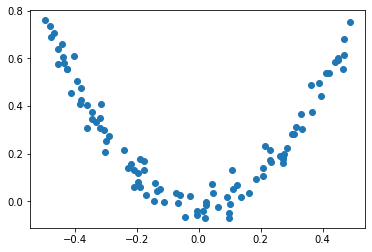

In [33]:
import matplotlib.pyplot as plt

plt.scatter(X,y)

In [37]:
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [41]:
# Train a second DecisionTreeRegressor on the residal erros made by the first predictor

y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2)

In [43]:
# Train a third DecisionTreeRegressor on the residal erros made by the second predictor
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2)

In [44]:
# Now we have an ensemble containing three trees. It can make prediciton on a new instance simply by adding up the prediciton of all the trees.
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([0.75026781])

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X,y)
gbrt.predict(X_new)

array([0.75026781])

In [51]:
# Find the best numer of trees

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

# 120 errors on validation set at each stage
errors = [mean_squared_error(y_val, y_pred)
         for y_pred in gbrt.staged_predict(X_val)]


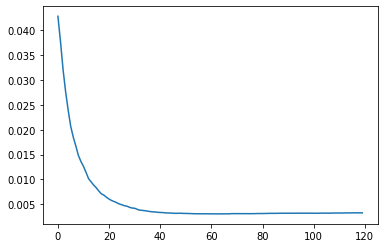

In [57]:
plt.plot(errors)

In [52]:
len(errors)

120

In [55]:
best_n_estimators = np.argmin(errors) +1
best_n_estimators # 63 trees is the best value

63

In [58]:
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=63)

In [60]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else: 
        error_going_up += 1
        if error_going_up == 5:
            break #early stopping

In [62]:
n_estimators - 5 # best estimators

63

### Stacking

### Exericises

In [5]:
import numpy as np
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

In [6]:
len(mnist.data) # 70k points

70000

In [7]:
# Split : 50k training, 10k validation, 10k test

X_train_val, X_test, y_train_val, y_test = train_test_split(mnist.data, mnist.target, test_size=10000, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size= 10000, random_state=42)

In [8]:
for a,b in zip(["X_train","X_val","X_test"],[X_train, X_val, X_test]):
    print(a, len(b))

X_train 50000
X_val 10000
X_test 10000


In [9]:
# Train various classifiers

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
extra_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(tol=20, max_iter=100, random_state=42, probability=True)

In [10]:
for estimator in [rf_clf, extra_clf, svm_clf]:
    print('Training the', estimator.__class__.__name__)
    estimator.fit(X_train, y_train)

Training the RandomForestClassifier
Training the ExtraTreesClassifier
Training the SVC


In [11]:
[estimator.score(X_val, y_val) for estimator in [rf_clf, extra_clf, svm_clf]]

[0.9692, 0.9715, 0.0956]

In [12]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('rf', rf_clf), ('extra', extra_clf), ('svm',svm_clf)],
                              voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('extra', ExtraTreesClassifier(random_state=42)),
                             ('svm',
                              SVC(max_iter=100, probability=True,
                                  random_state=42, tol=20))])

In [13]:
voting_clf.score(X_val, y_val)

0.9706

In [14]:
voting_clf.voting = 'soft'
voting_clf.score(X_val, y_val)

0.9717

# 9. Sacking Ensemble

In [24]:
estimators = np.array([rf_clf, extra_clf, svm_clf])

In [35]:
X_val_predictions = np.empty((len(X_val), len(estimators)), dtype=np.float32)

for index, estimator in enumerate(estimators):
    X_val_predictions[:,index] = estimator.predict(X_val)

In [39]:
X_val_predictions # each column j represents predictions for estimator j

array([[5., 5., 9.],
       [8., 8., 9.],
       [2., 2., 9.],
       ...,
       [7., 7., 9.],
       [6., 6., 9.],
       [7., 7., 9.]], dtype=float32)

In [40]:
rnd_forest_blender = RandomForestClassifier(n_estimators=200, random_state=42, oob_score=True) # oob_score to compute validation score on not trained data
rnd_forest_blender.fit(X_val_predictions, y_val) # train on prediction from previous classifiers

RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)

In [41]:
rnd_forest_blender.oob_score_

0.971

In [43]:
X_test_predictions = np.empty((len(X_test), len(estimators)), dtype=np.float32)

for index, estimator in enumerate(estimators):
    X_test_predictions[:, index] = estimator.predict(X_test)

In [44]:
X_test_predictions

array([[8., 8., 9.],
       [4., 4., 9.],
       [8., 8., 9.],
       ...,
       [3., 3., 9.],
       [8., 8., 9.],
       [3., 3., 9.]], dtype=float32)

In [45]:
y_pred = rnd_forest_blender.predict(X_test_predictions)

In [48]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9654